In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image


In [2]:
# Import TensorFlow library for deep learning functionalities
import tensorflow as tf

# List all available GPUs
gpu = tf.config.list_physical_devices("GPU")

# Configure GPU memory growth for each identified GPU
for gpu in gpu:
    # Enable dynamic memory growth to allocate memory on-the-fly
    tf.config.experimental.set_memory_growth(gpu, True)


In [3]:
# Use glob to retrieve file paths for breast cancer images in the specified directory and its subdirectories
breast_img = glob.glob('data_set/IDC_regular_ps50_idx5/**/*.png', recursive=True)

# Print the first three image file paths for initial inspection
for imgname in breast_img[:3]:
    print(imgname)

# Print the first and last image file paths to check the range of the dataset
print(breast_img[0], breast_img[-1])

data_set/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
data_set/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
data_set/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png


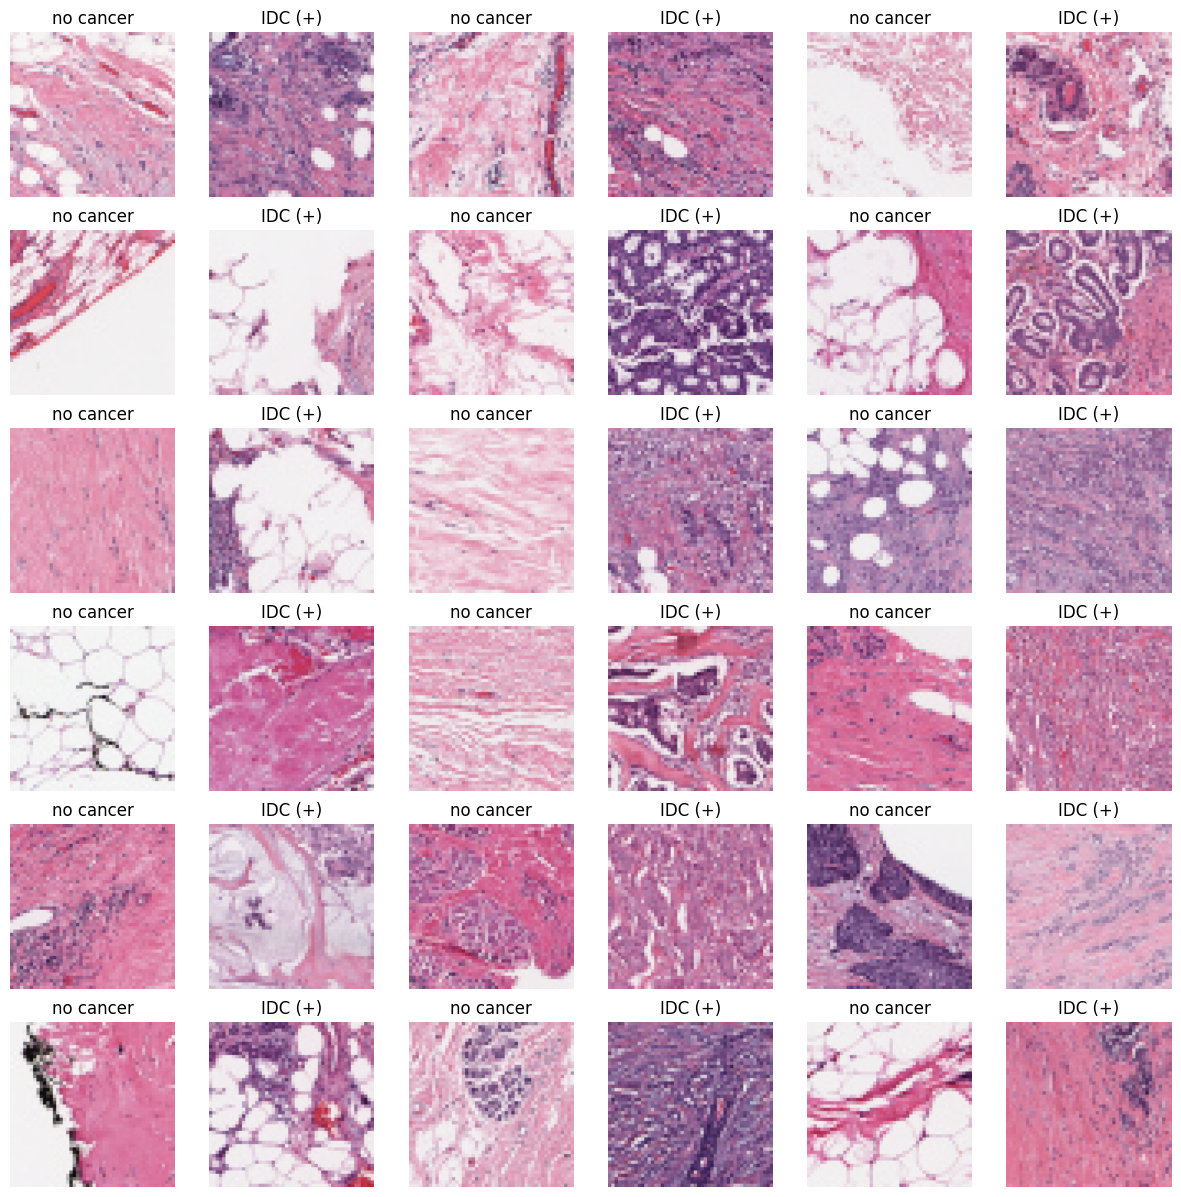

In [4]:
# Create two empty lists to store file names based on the presence or absence of cancer (IDC)
N_IDC = []  # List for images without cancer
P_IDC = []  # List for images with IDC

# Iterate through each image in the 'breast_img' list
for img in breast_img:
    # Check the label in the file name to determine if it's cancerous or not
    if img[-5] == '0':
        N_IDC.append(img)  # If the label is '0', add to the list of images without cancer
    elif img[-5] == '1':
        P_IDC.append(img)  # If the label is '1', add to the list of images with IDC

# Plot a grid of 6x6 images, displaying a random selection of 18 images without cancer and 18 images with IDC
plt.figure(figsize=(15, 15))

# Display images without cancer
s = 0  # Counter for subplot position
for num in np.random.randint(0, len(N_IDC), 18):
    img = image.load_img(N_IDC[num], target_size=(100, 100))
    img = image.img_to_array(img)
    
    plt.subplot(6, 6, 2 * s + 1)
    plt.axis('off')
    plt.title('no cancer')
    plt.imshow(img.astype('uint8'))
    s += 1

# Display images with IDC
s = 1  # Counter for subplot position
for num in np.random.randint(0, len(P_IDC), 18):
    img = image.load_img(P_IDC[num], target_size=(100, 100))
    img = image.img_to_array(img)
    
    plt.subplot(6, 6, 2 * s)
    plt.axis('off')
    plt.title('IDC (+)')
    plt.imshow(img.astype('uint8'))
    s += 1

# Show the plot
plt.show()



In [5]:
NewN_IDC=N_IDC[:78786]
print(len(NewN_IDC))
print(len(P_IDC))

78786
78786


**initializes two arrays, one for non-cancerous images and another for cancerous images. The code then reads and resizes each image to a fixed size of 50x50 pixels, assigning a label of 0 for non-cancerous and 1 for cancerous. This process prepares the data for training or evaluating a machine learning model designed to classify medical images into these two categories.**

In [6]:


# Create two lists to store image arrays and corresponding labels (0 for non-cancer, 1 for cancer)
non_img_arr = []  # List for images without cancer
can_img_arr = []  # List for images with cancer

# Process images without cancer
for img in NewN_IDC:
    # Read the image using OpenCV
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    
    # Resize the image to 50x50 pixels using linear interpolation
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    
    # Append the resized image array and the label 0 to the list
    non_img_arr.append([n_img_size, 0])

# Process images with cancer (IDC)
for img in P_IDC:
    # Read the image using OpenCV
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    
    # Resize the image to 50x50 pixels using linear interpolation
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    
    # Append the resized image array and the label 1 to the list
    can_img_arr.append([c_img_size, 1])



In [7]:
print(len(non_img_arr))
print(len(can_img_arr))
print(len(non_img_arr)+len(can_img_arr))

78786
78786
157572


 two arrays, X and y, to store features and labels, respectively. It concatenates non-cancerous and cancerous image arrays, shuffles the combined array, and then iterates through it. For each image-feature and label pair, it appends the feature to the X array and the label to the y array. Finally, it converts both arrays into NumPy arrays for further processing, likely for training a machine learning model where X represents the input features, and y represents the corresponding labels.

In [9]:
import numpy as np
import random

# Create empty lists to store features (X) and labels (y)
X = []  # List for features
y = []  # List for labels

# Concatenate non-cancer and cancer image arrays and limit the number to 12389 samples
breast_img_arr = np.concatenate((non_img_arr[:12389], can_img_arr[:12389]))

# Shuffle the combined array randomly
random.shuffle(breast_img_arr)

# Iterate through the shuffled array and separate features and labels
for feature, label in breast_img_arr:
    X.append(feature)  # Append the image array to X
    y.append(label)    # Append the label to y

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)


In [10]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)


Total number of images: 24778
Number of IDC(-) Images: 20995
Number of IDC(+) Images: 3783
Image shape (Width, Height, Channels): (50, 50, 3)


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

# Convert the labels to categorical format using one-hot encoding
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

# Print the shapes of the training and testing datasets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)



Training Data Shape: (17344, 50, 50, 3)
Testing Data Shape: (7434, 50, 50, 3)


In [12]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Create a sequential model
model = Sequential()

# First convolutional layer with 32 filters, each of size (3, 3), using 'same' padding and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)))

# Max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(2, 2))

# Dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Second convolutional layer with 64 filters, each of size (3, 3), using 'same' padding and ReLU activation
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(2, 2))

# Dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Third convolutional layer with 128 filters, each of size (3, 3), using 'same' padding and ReLU activation
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# Max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(2, 2))

# Dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Fourth convolutional layer with 128 filters, each of size (3, 3), using 'same' padding and ReLU activation
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# Max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(2, 2))

# Dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten layer to convert 3D output to 1D
model.add(Flatten())

# Fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 2 neurons and sigmoid activation (binary classification)
model.add(Dense(2, activation='sigmoid'))



In [22]:
model.compile(Adamax(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 60, batch_size = 35)

Epoch 1/60
496/496 [==============================] - 5s 9ms/step - loss: 3.4672 - accuracy: 0.7904 - val_loss: 0.5908 - val_accuracy: 0.8245
Epoch 2/60
496/496 [==============================] - 5s 9ms/step - loss: 0.7224 - accuracy: 0.8025 - val_loss: 0.6415 - val_accuracy: 0.8434
Epoch 3/60
496/496 [==============================] - 5s 9ms/step - loss: 0.5391 - accuracy: 0.8259 - val_loss: 0.6232 - val_accuracy: 0.8434
Epoch 4/60
496/496 [==============================] - 5s 9ms/step - loss: 0.4829 - accuracy: 0.8376 - val_loss: 0.5672 - val_accuracy: 0.8432
Epoch 5/60
496/496 [==============================] - 5s 9ms/step - loss: 0.4192 - accuracy: 0.8438 - val_loss: 0.5751 - val_accuracy: 0.8554
Epoch 6/60
496/496 [==============================] - 5s 9ms/step - loss: 0.3550 - accuracy: 0.8514 - val_loss: 0.5058 - val_accuracy: 0.8803
Epoch 7/60
496/496 [==============================] - 5s 9ms/step - loss: 0.3297 - accuracy: 0.8609 - val_loss: 0.5055 - val_accuracy: 0.8539
Epoch 

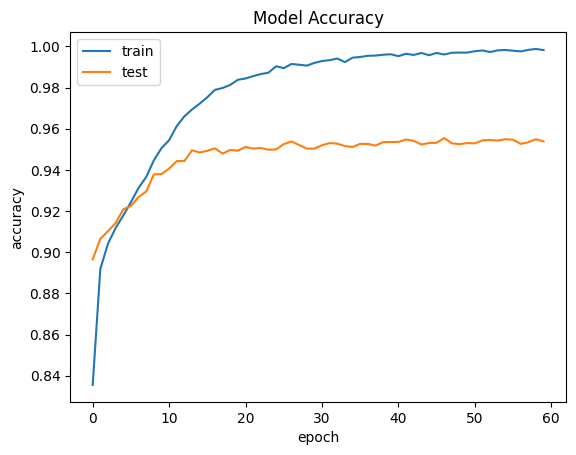

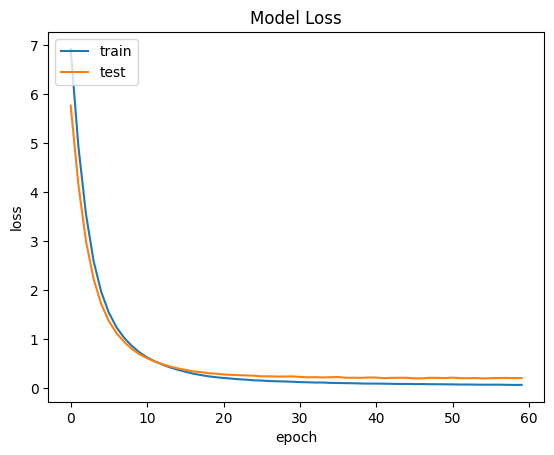

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


233/233 [==============================] - 8s 20ms/step


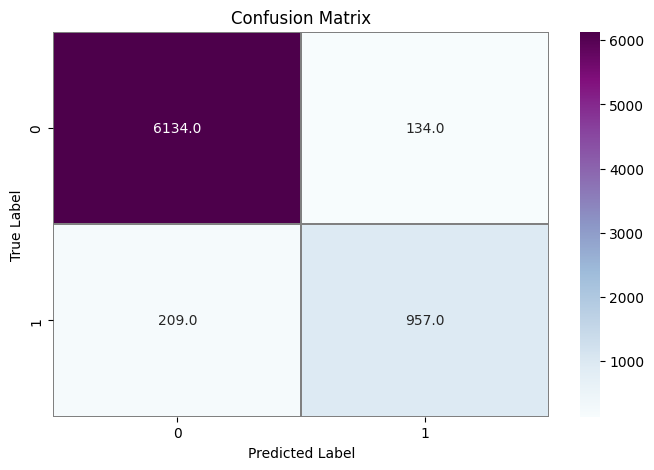

In [16]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
#accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
#print(accuracy)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


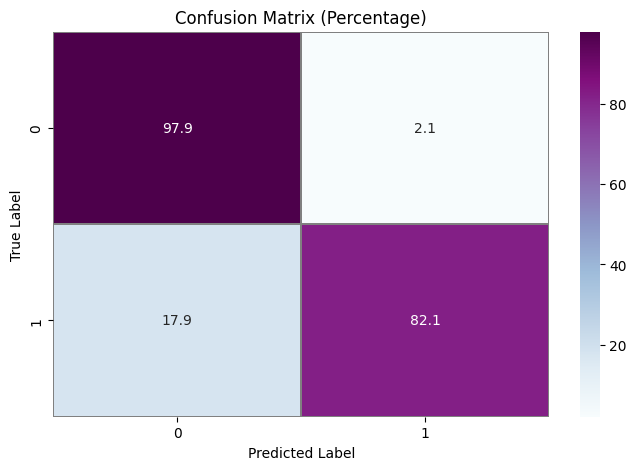

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1) 
Y_true = np.argmax(Y_test, axis=1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# calculate the percentage
confusion_mtx_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_mtx_percent, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()


In [18]:
model.evaluate(X_test,Y_test)

233/233 [==============================] - 5s 21ms/step - loss: 0.2050 - accuracy: 0.9539


[0.20503561198711395, 0.9538606405258179]

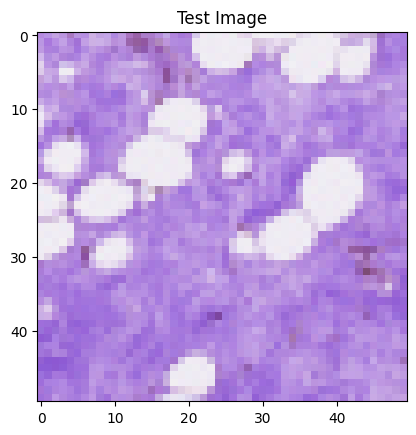

In [19]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 1000
img_plot(X_test, index)

In [20]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
index = 4000
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)


1/1 [==============================] - 0s 130ms/step
Predicted Value using  cnn model 0
True Value 0


In [23]:
model.save("/kaggle/working/Brest CNN 2.h5")